### Laboratorio #7

- Roberto Vallecillos
- Alejandro Gomez
- Paola Contreras

In [73]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [74]:
# Lectura archivo

BankCSV = pd.read_csv('bank_transactions.csv')

In [75]:
# Mostrar datos del archivo

BankCSV.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [76]:
# Droppear datos nulos
BankCSV.dropna(inplace=True)

# Droppear columnas que no se usaran
BankCSV.drop(["TransactionID", "CustomerID", "CustomerDOB", "TransactionDate"], axis=1)

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,143207,25.0
1,M,JHAJJAR,2270.69,141858,27999.0
2,F,MUMBAI,17874.44,142712,459.0
3,F,MUMBAI,866503.21,142714,2060.0
4,F,NAVI MUMBAI,6714.43,181156,1762.5
...,...,...,...,...,...
1048562,M,NEW DELHI,7635.19,184824,799.0
1048563,M,NASHIK,27311.42,183734,460.0
1048564,M,HYDERABAD,221757.06,183313,770.0
1048565,M,VISAKHAPATNAM,10117.87,184706,1000.0


In [77]:
# Describir datos
BankCSV.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


<AxesSubplot:>

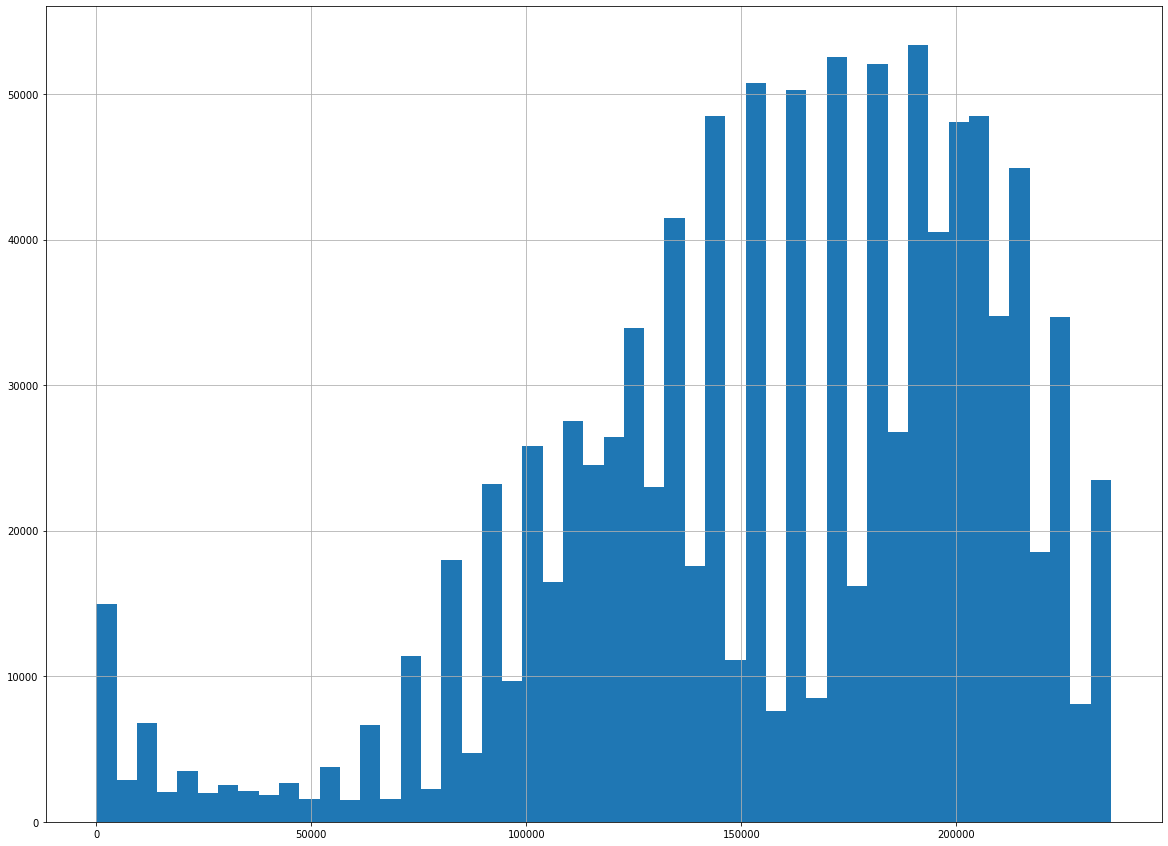

In [78]:
# Graficos exploratorios

BankCSV["TransactionTime"].hist(bins=50, figsize=(20,15))

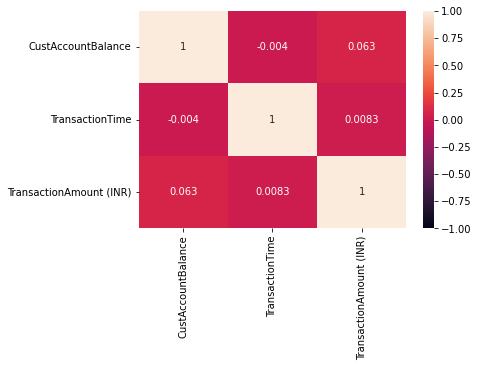

In [79]:
# Grafico de correlacion

corr_matrix = BankCSV.corr()

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

M    760978
F    280635
T         1
Name: CustGender, dtype: int64


<AxesSubplot:xlabel='CustGender', ylabel='count'>

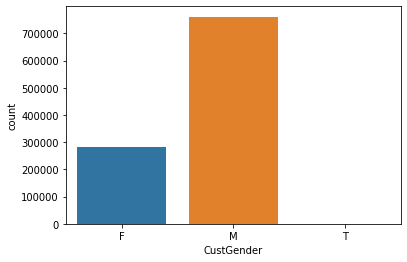

In [80]:
# Grafico exploratorio
print(BankCSV["CustGender"].value_counts())

sns.countplot(x="CustGender", data=BankCSV)

<AxesSubplot:xlabel='TransactionTime', ylabel='TransactionAmount (INR)'>

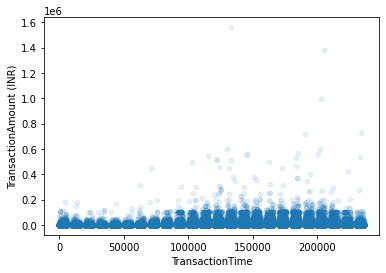

In [81]:
# Grafico exploratorio

BankCSV.plot(kind="scatter", x="TransactionTime", y="TransactionAmount (INR)" , alpha=0.1)

In [82]:
X = BankCSV[["CustAccountBalance", "TransactionAmount (INR)"]]

<AxesSubplot:xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

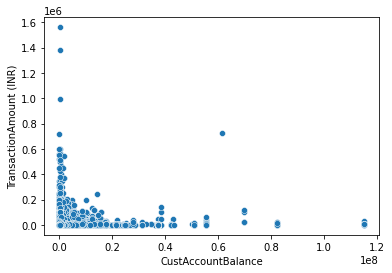

In [89]:
sns.scatterplot(x="CustAccountBalance", y="TransactionAmount (INR)", data=X)

In [83]:
# Label encoder para genero
LabelEncoder = LabelEncoder()
BankCSV['CustGender'] = LabelEncoder.fit_transform(BankCSV['CustGender'])

In [84]:
def DistanciaEuclediana(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [90]:
def KMeansCodo(X, kmax):
    sse = []
    C = X.iloc[np.random.choice(X.index, kmax, replace=False)]
    for i in range(1, kmax+1):
        Cluster = [[] for _ in range(i)]
        for y in X.index:
            Distancias = [DistanciaEuclediana(X.loc[y], C.loc[c]) for c in C.index]
            Cluster[Distancias.index(min(Distancias))].append(y)
        SSE = 0
        for j in range(i):
            for y in Cluster[j]:
                SSE += np.sum((X.loc[y] - C.loc[C.index[j]])**2)
                Clusters = np.array(Cluster[j])
                C = np.mean(X.loc[Clusters], axis=0)
        sse.append(SSE)                
        
ClusterSeleccionado = 3
Centroides = (X.iloc[np.random.choice(X.index, ClusterSeleccionado, replace=False)])


In [ ]:
# DESCOMENTAR CUANDO SE HAYA CORRIDO FUNCION

#sns.lineplot(x=range(1, kmax+1), y=sse)
